___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-2 (CNN)<br><br>Image Classification with CNN<br><h1>

# Task and Dataset Info

Welcome to second assignment of Deep learning lesson. Follow the instructions and complete the assignment.

**Build an image classifier with Convolutional Neural Networks for the Fashion MNIST dataset. This data set includes 10 labels of different clothing types with 28 by 28 *grayscale* images. There is a training set of 60,000 images and 10,000 test images.**

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot

# Import Libraries

In [7]:
try:
    import jupyter_black
    jupyter_black.load()
except ImportError:
    print("You can safely ignore this message.")

You can safely ignore this message.


In [8]:
import os

# Set TF log level to ignore INFOs.
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "1"

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["figure.figsize"] = (10, 6)

sns.set_style("whitegrid")
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option("display.max_columns", None)

np.set_printoptions(suppress=True)

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.plotting import plot_confusion_matrix
#data
import numpy as np
import pandas as pd
#tensorflow/keras
import tensorflow as tf
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.utils import to_categorical
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization
from keras.callbacks import EarlyStopping
#sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
#optimization
from keras.optimizers import Adam, Adadelta, RMSprop, Nadam
import optuna
#model saving
import pickle
from keras.models import load_model

In [11]:
from matplotlib import style
style.use('dark_background')

from sklearn.metrics import (
    classification_report,
    confusion_matrix,
)

In [12]:
import tensorflow as tf

if tf.config.list_physical_devices("GPU"):
    print("GPU support is enabled for this session.")
else:
    print("CPU will be used for this session.")

GPU support is enabled for this session.


# Recognizing and Understanding Data

**TASK 1: Run the code below to download the dataset using Keras.**

In [88]:
from keras.datasets import fashion_mnist
# loading data
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [8]:
print(f"There are {len(X_train)} images in the training dataset")
print(f"There are {len(X_test)} images in the test dataset")

There are 60000 images in the training dataset
There are 10000 images in the test dataset


In [9]:
# Checking the shape of one image
X_train[1738].shape

(28, 28)

**TASK 2: Use matplotlib to view an image from the data set. It can be any image from the data set.**

In [10]:
# defining our classes for ease of use
classes=["T-shirt/top", "Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

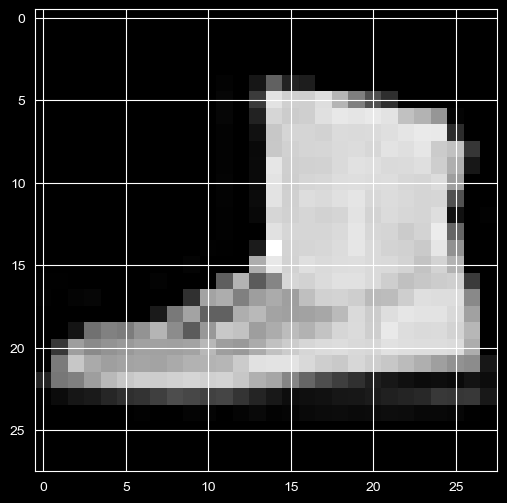

In [11]:
plt.imshow(X_train[1738], cmap="gray")

<Axes: >

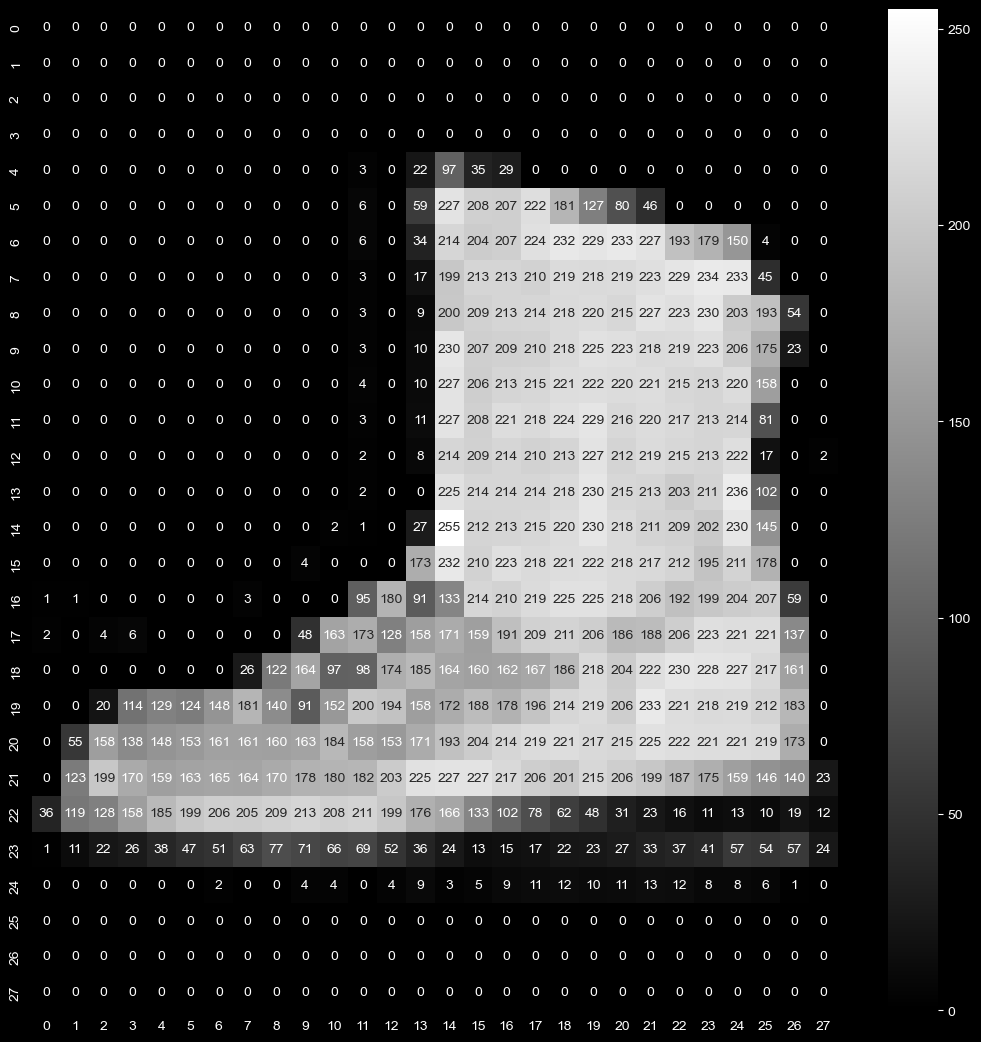

In [12]:
plt.figure(figsize=(13, 13))
sns.heatmap(X_train[1738], annot=True, cmap="gray", fmt=".3g")

In [13]:
len(X_train[1738])

28

In [14]:
y_train[1738]
# This is the label of this image (which corresponds to Ankle Boot)

9

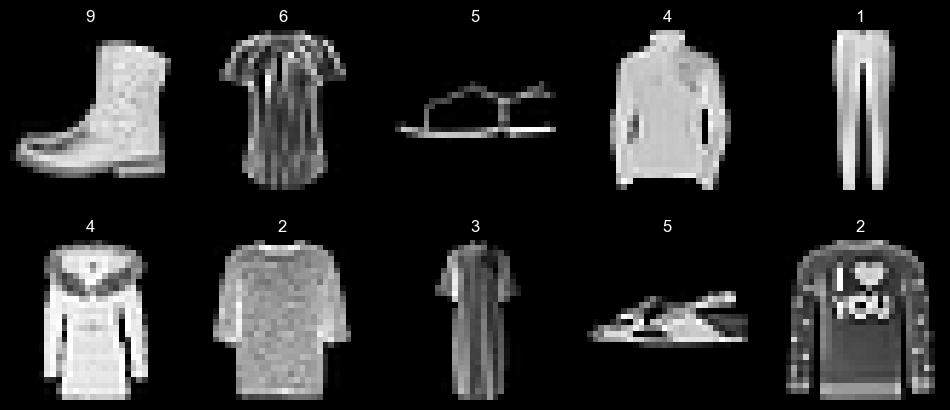

In [15]:
f, axes = plt.subplots(2, 5, figsize=(12, 5))

for ax in axes.ravel():
    idx = np.random.randint(0, len(X_train))
    ax.axis("off")
    ax.set_title(y_train[idx])
    ax.imshow(X_train[idx], cmap="gray")
plt.show()

# Data Preprocessing

**TASK 3: Normalize the X train and X test data by dividing by the max value of the image arrays.**

In [16]:
X_train[1738].min()

0

In [17]:
X_train[1738].max()

255

In [90]:
X_train = X_train.astype("float32")
X_test = X_test.astype("float32")
X_train /= 255
X_test /= 255

In [19]:
X_train[1738].min()

0.0

In [20]:
X_train[1738].max()

1.0

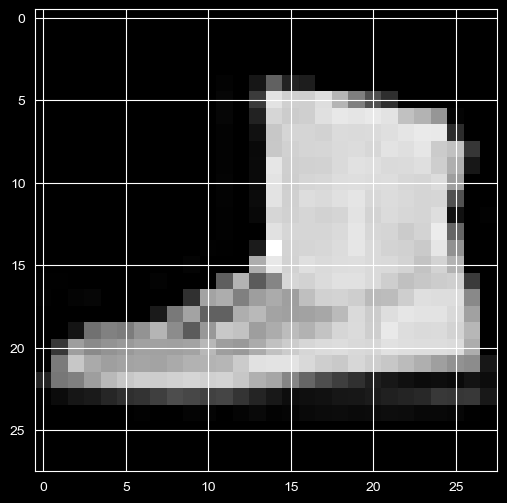

In [21]:
plt.imshow(X_train[1738], cmap="gray")
plt.show()

**Task 4: Reshape the X arrays to include a 4 dimension of the single channel. Similar to what we did for the numbers MNIST data set.**

In [22]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [91]:
X_train = np.expand_dims(X_train, 3)
X_test = np.expand_dims(X_test, 3)

In [24]:
X_train.shape

(60000, 28, 28, 1)

In [25]:
X_test.shape

(10000, 28, 28, 1)

**TASK 5: Convert the y_train and y_test values to be one-hot encoded for categorical analysis by Keras.**

In [26]:
y_train.shape

(60000,)

In [27]:
y_test.shape

(10000,)

In [92]:
from keras.utils import to_categorical

In [93]:
Y_train = to_categorical(y_train, 10)
Y_test = to_categorical(y_test, 10)
Y_train.shape

(60000, 10)

In [30]:
y_train[1738]

9

In [31]:
Y_train[1738]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

# Modeling

## Create the model

**TASK 5: Use Keras to create a model consisting of at least the following layers (but feel free to experiment):**

* 2D Convolutional Layer, filters=28 and kernel_size=(3,3)
* Pooling Layer where pool_size = (2,2) strides=(1,1)

* Flatten Layer
* Dense Layer (128 Neurons, but feel free to play around with this value), RELU activation

* Final Dense Layer of 10 Neurons with a softmax activation

**Then compile the model with these parameters: loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']**

In [32]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [86]:
model = Sequential()

model.add(
    Conv2D(filters=28,
           kernel_size=(3, 3),
           input_shape=(28, 28, 1),
           activation="relu"))

model.add(MaxPool2D(pool_size=(2, 2), strides=(1, 1)))

model.add(Flatten())

model.add(Dense(128, activation="relu"))

model.add(Dense(10, activation="softmax"))

model.compile(loss="categorical_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

##  Model Training 

**TASK 6: Train/Fit the model to the x_train set by using EarlyStop. Amount of epochs is up to you.**

In [34]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 28)        280       
                                                                 
 max_pooling2d (MaxPooling2  (None, 25, 25, 28)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 17500)             0         
                                                                 
 dense (Dense)               (None, 128)               2240128   
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 2241698 (8.55 MB)
Trainable params: 2241698 (8.55 MB)
Non-trainable params: 0 (0.00 Byte)
__________________

In [95]:
from keras.callbacks import EarlyStopping

early_stop = EarlyStopping(
    monitor="val_accuracy", mode="max", patience=4, restore_best_weights=True)

In [96]:
model.fit(
    X_train,
    Y_train,
    batch_size=32,
    epochs=20,
    validation_data=(X_test, Y_test),
    callbacks=[early_stop],
)

Epoch 1/20
1875/1875 [==============================] - 100s 52ms/step - loss: 0.3941 - accuracy: 0.8642 - val_loss: 0.3352 - val_accuracy: 0.8809
Epoch 2/20
1875/1875 [==============================] - 96s 51ms/step - loss: 0.2971 - accuracy: 0.8992 - val_loss: 0.3713 - val_accuracy: 0.8688
Epoch 3/20
1875/1875 [==============================] - 97s 52ms/step - loss: 0.2826 - accuracy: 0.9051 - val_loss: 0.3307 - val_accuracy: 0.8945
Epoch 4/20
1875/1875 [==============================] - 97s 52ms/step - loss: 0.2953 - accuracy: 0.9059 - val_loss: 0.4033 - val_accuracy: 0.8825
Epoch 5/20
1875/1875 [==============================] - 98s 52ms/step - loss: 0.3236 - accuracy: 0.9050 - val_loss: 0.4670 - val_accuracy: 0.8908
Epoch 6/20
1875/1875 [==============================] - 100s 53ms/step - loss: 0.3739 - accuracy: 0.9023 - val_loss: 0.5453 - val_accuracy: 0.8849
Epoch 7/20
1875/1875 [==============================] - 100s 53ms/step - loss: 0.4441 - accuracy: 0.8998 - val_loss: 0.945

**TASK 7: Plot values of metrics you used in your model.**

In [97]:
model.metrics_names

['loss', 'accuracy']

In [98]:
def plot_subplots():
    
    loss_df = pd.DataFrame(model.history.history)
    
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

    # Plotting the first subplot (valscores1)
    valscores1 = loss_df.drop(columns=["accuracy", "val_accuracy"], axis=1)
    valscores1.plot(ax=axes[0])
    axes[0].set_title("Loss Scores")
    axes[0].set_xlabel("Epochs")
    axes[0].set_ylabel("Scores")

    # Plotting the second subplot (accscores1)
    accscores1 = loss_df.drop(columns=["loss", "val_loss"], axis=1)
    accscores1.plot(ax=axes[1])
    axes[1].set_title("Accuracy Scores")
    axes[1].set_xlabel("Epochs")
    axes[1].set_ylabel("Scores")

    # Adjust layout
    plt.tight_layout()

    # Show the plots
    plt.show()

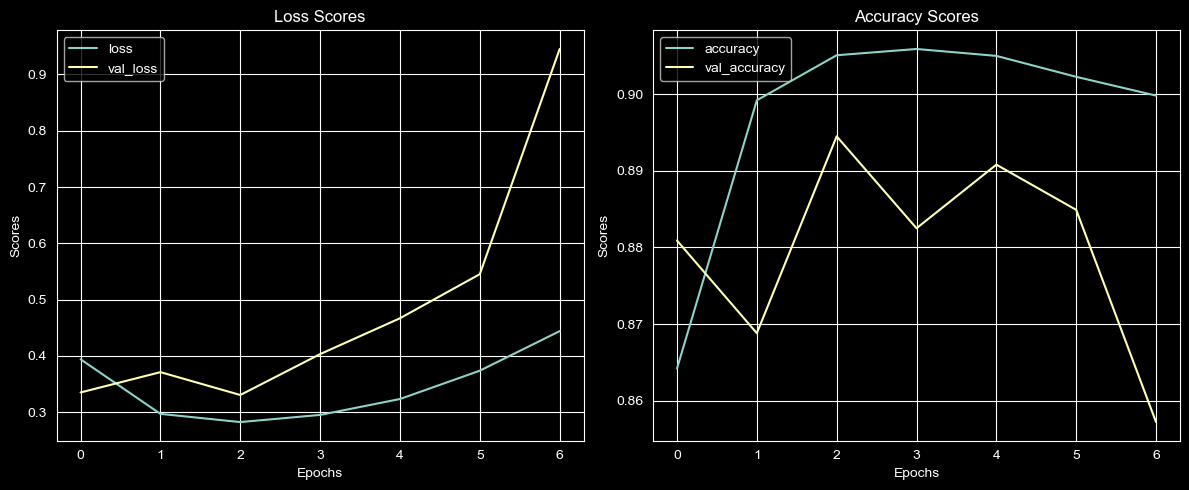

In [99]:
plot_subplots()

## Model Evaluation

**TASK 8: Show the accuracy,precision,recall,f1-score the model achieved on the x_test data set. Keep in mind, there are quite a few ways to do this, but we recommend following the same procedure we showed in the MNIST lecture.**

- Create a function to evaluate model (classification report) + confusion matrices for test & train
- Store different evaluation scores throughout different versions of model

313/313 [==============================] - 1s 3ms/step
              precision    recall  f1-score   support

           0       0.78      0.89      0.83      1000
           1       0.99      0.97      0.98      1000
           2       0.86      0.83      0.84      1000
           3       0.87      0.92      0.90      1000
           4       0.87      0.80      0.83      1000
           5       0.96      0.97      0.97      1000
           6       0.72      0.69      0.71      1000
           7       0.96      0.94      0.95      1000
           8       0.99      0.96      0.98      1000
           9       0.96      0.96      0.96      1000

    accuracy                           0.89     10000
   macro avg       0.90      0.89      0.89     10000
weighted avg       0.90      0.89      0.89     10000

-------------------------------------------------------------


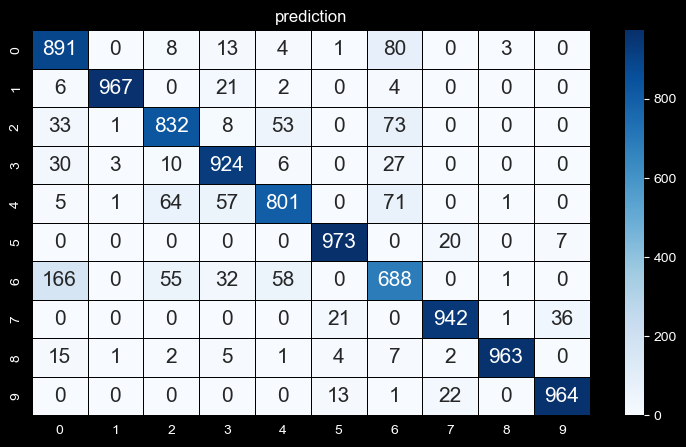

-------------------------------------------------------------



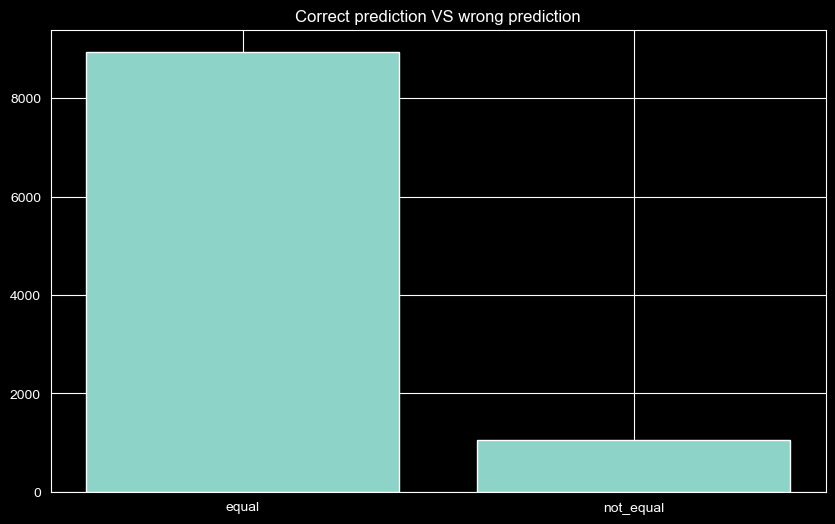

In [100]:
pred_prob = model.predict(X_test)
y_pred = np.argmax(pred_prob, axis=1)
print(classification_report(y_test, y_pred))
print("-------------------------------------------------------------")
plt.figure(figsize=(9, 5))
sns.heatmap(
    confusion_matrix(y_test, y_pred),
    annot=True,
    cmap="Blues",
    linewidths=0.5,
    linecolor="black",
    fmt="g",
    annot_kws={"size": 15},)
plt.title("prediction")
plt.show();
print("-------------------------------------------------------------\n")
equal = np.equal(y_test, y_pred).sum()
not_equal= np.not_equal(y_test, y_pred).sum()
plt.bar(['equal','not_equal'] , [equal,not_equal] )
plt.title("Correct prediction VS wrong prediction")
plt.show();

In [101]:
score = model.evaluate(X_test, Y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.3306923806667328
Test accuracy: 0.8945000171661377


# End of Attempt 1

# Another Attempt (With Validation and a new Model)

# Recognizing and Understanding Data

**TASK 1: Run the code below to download the dataset using Keras.**

In [13]:
from keras.datasets import fashion_mnist

(X_train2, y_train2), (X_test2, y_test2) = fashion_mnist.load_data()

In [14]:
from sklearn.model_selection import train_test_split

X_train2, X_val, y_train2, y_val = train_test_split(X_train2, y_train2, test_size = 0.1, stratify = y_train2)

In [15]:
y_train2.shape

(54000,)

In [16]:
y_val.shape

(6000,)

In [17]:
y_test2.shape

(10000,)

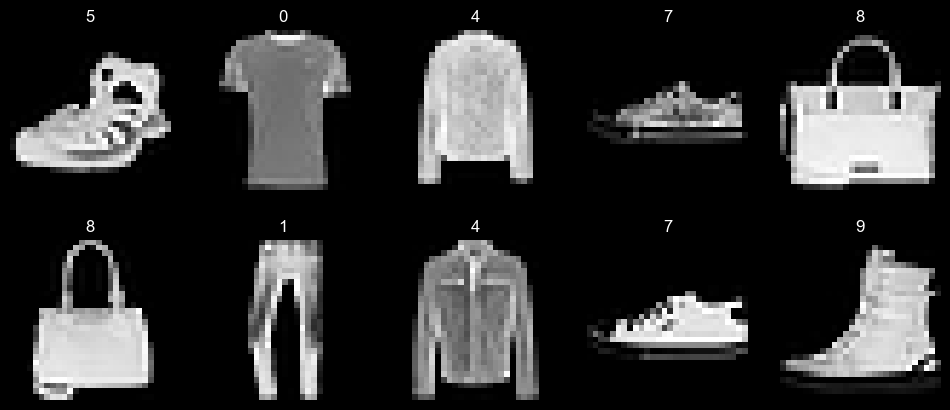

In [18]:
f, axes = plt.subplots(2, 5, figsize=(12, 5))

for ax in axes.ravel():
    idx = np.random.randint(0, len(X_train2))
    ax.axis("off")
    ax.set_title(y_train2[idx])
    ax.imshow(X_train2[idx], cmap="gray")
plt.show()

# Data Preprocessing

**TASK 3: Normalize the X train and X test data by dividing by the max value of the image arrays.**

In [19]:
X_train2[1738].min()

0

In [20]:
X_train2[1738].max()

255

In [21]:
X_val[1738].min()

0

In [22]:
X_val[1738].max()

255

In [23]:
X_train2 = X_train2.astype("float32")
X_val = X_val.astype("float32")
X_test2 = X_test2.astype("float32")
X_train2 /= 255
X_test2 /= 255
X_val /= 255

In [24]:
X_train2[1738].min()

0.0

In [25]:
X_train2[1738].max()

1.0

In [26]:
X_val[1738].min()

0.0

In [27]:
X_val[1738].max()

1.0

In [28]:
X_train2.shape, X_test2.shape, X_val.shape

((54000, 28, 28), (10000, 28, 28), (6000, 28, 28))

In [29]:
X_train2 = np.expand_dims(X_train2, 3)
X_test2 = np.expand_dims(X_test2, 3)
X_val = np.expand_dims(X_val, 3)

In [30]:
X_train2.shape

(54000, 28, 28, 1)

In [31]:
X_val.shape

(6000, 28, 28, 1)

In [32]:
X_test2.shape

(10000, 28, 28, 1)

In [33]:
y_train2.shape

(54000,)

In [34]:
y_test2.shape

(10000,)

In [35]:
from keras.utils import to_categorical

In [36]:
Y_train2 = to_categorical(y_train2, 10)
Y_test2 = to_categorical(y_test2, 10)
Y_val = to_categorical(y_val, 10)
Y_train2.shape, Y_test2.shape, Y_val.shape

((54000, 10), (10000, 10), (6000, 10))

In [37]:
y_train2[1738]

9

In [38]:
Y_train2[1738]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

# Modeling

In [39]:
from livelossplot import PlotLossesKerasTF

In [41]:
model2 = Sequential()

model2.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(28, 28, 1), activation="relu",
                 padding="same"))
model2.add(MaxPool2D(pool_size=(2, 2), strides = (1, 1)))
model2.add(Flatten())
model2.add(Dense(128, activation="relu"))
model2.add(Dense(10, activation="softmax"))

model2.compile(loss="categorical_crossentropy", optimizer="rmsprop", metrics=["accuracy"])

##  Model Training 

**TASK 6: Train/Fit the model to the x_train set by using EarlyStop. Amount of epochs is up to you.**

In [42]:
from keras.callbacks import EarlyStopping

early_stop = EarlyStopping(
    monitor="val_loss", mode="min", patience=4, restore_best_weights=True)

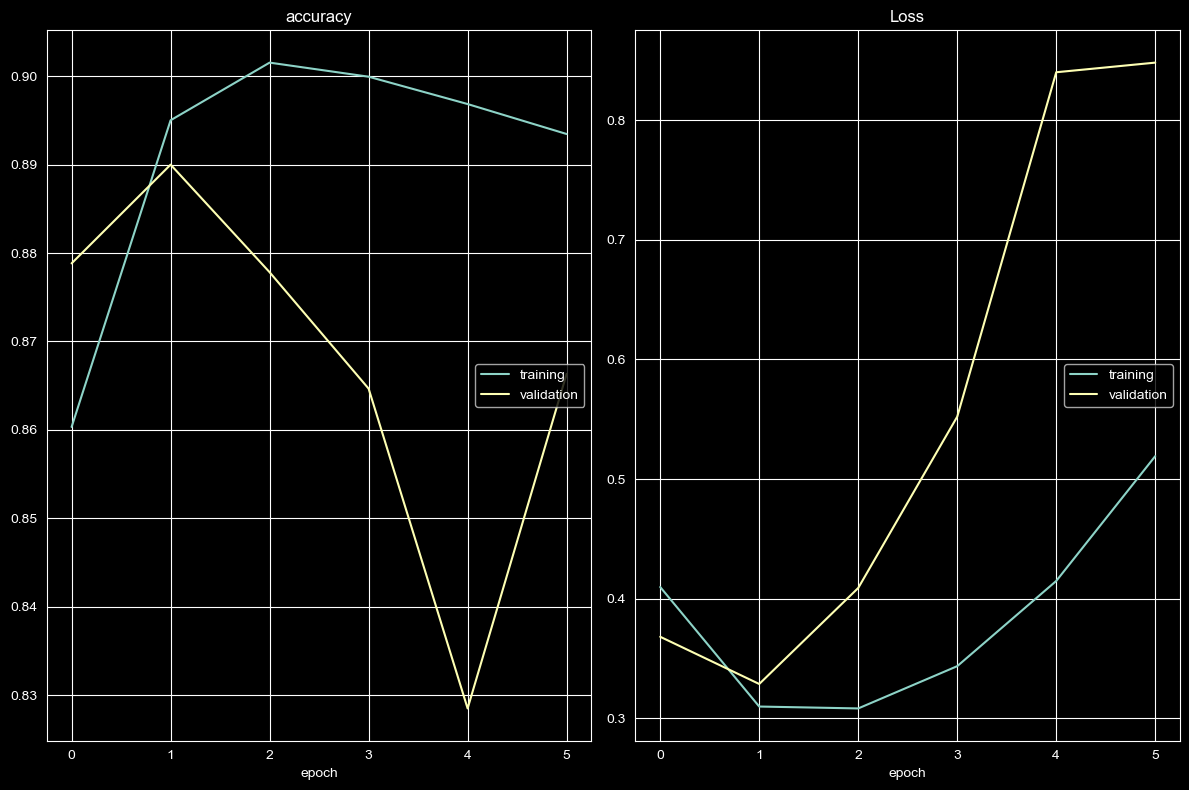

accuracy
	training         	 (min:    0.860, max:    0.902, cur:    0.893)
	validation       	 (min:    0.828, max:    0.890, cur:    0.866)
Loss
	training         	 (min:    0.308, max:    0.519, cur:    0.519)
	validation       	 (min:    0.329, max:    0.848, cur:    0.848)
1688/1688 [==============================] - 88s 52ms/step - loss: 0.5192 - accuracy: 0.8935 - val_loss: 0.8480 - val_accuracy: 0.8663


In [44]:
model2.fit(
    X_train2,
    Y_train2,
    batch_size=32,
    epochs=20,
    validation_data=(X_val, Y_val),
    callbacks=[PlotLossesKerasTF(), early_stop],
)

In [45]:
def plot_subplots():
    
    loss_df = pd.DataFrame(model2.history.history)
    
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

    # Plotting the first subplot (valscores1)
    valscores1 = loss_df.drop(columns=["accuracy", "val_accuracy"], axis=1)
    valscores1.plot(ax=axes[0])
    axes[0].set_title("Loss Scores")
    axes[0].set_xlabel("Epochs")
    axes[0].set_ylabel("Scores")

    # Plotting the second subplot (accscores1)
    accscores1 = loss_df.drop(columns=["loss", "val_loss"], axis=1)
    accscores1.plot(ax=axes[1])
    axes[1].set_title("Accuracy Scores")
    axes[1].set_xlabel("Epochs")
    axes[1].set_ylabel("Scores")

    # Adjust layout
    plt.tight_layout()

    # Show the plots
    plt.show()

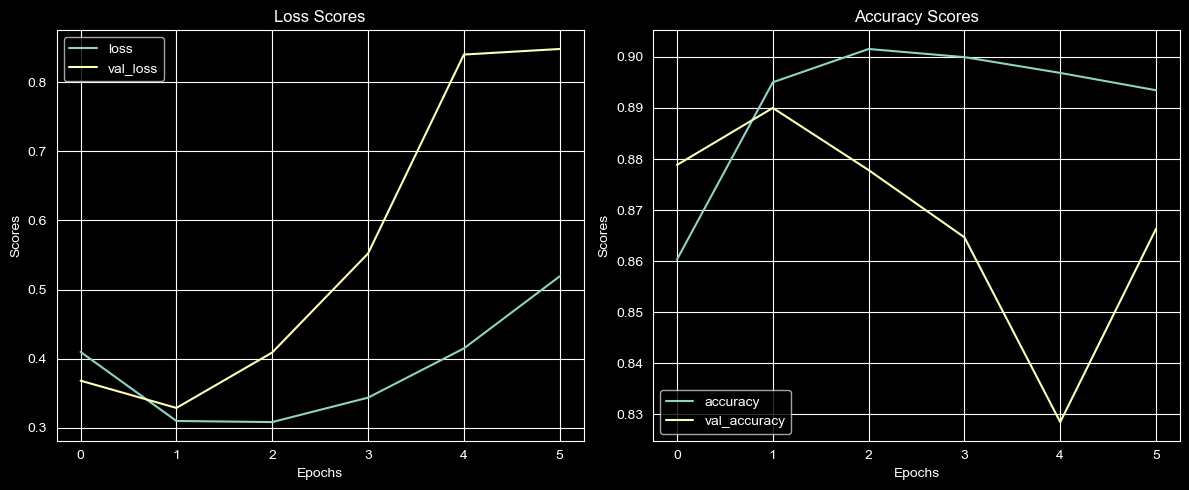

In [46]:
plot_subplots()

## Model Evaluation

**TASK 8: Show the accuracy,precision,recall,f1-score the model achieved on the x_test data set. Keep in mind, there are quite a few ways to do this, but we recommend following the same procedure we showed in the MNIST lecture.**

313/313 [==============================] - 1s 3ms/step
              precision    recall  f1-score   support

           0       0.76      0.89      0.82      1000
           1       0.92      0.99      0.96      1000
           2       0.83      0.83      0.83      1000
           3       0.93      0.82      0.87      1000
           4       0.83      0.82      0.83      1000
           5       0.96      0.98      0.97      1000
           6       0.77      0.62      0.68      1000
           7       0.96      0.95      0.95      1000
           8       0.92      0.99      0.95      1000
           9       0.97      0.96      0.96      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.88     10000
weighted avg       0.89      0.89      0.88     10000

-------------------------------------------------------------


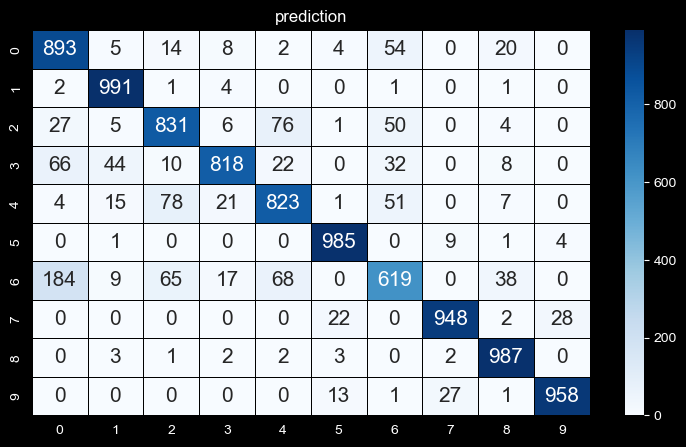

-------------------------------------------------------------



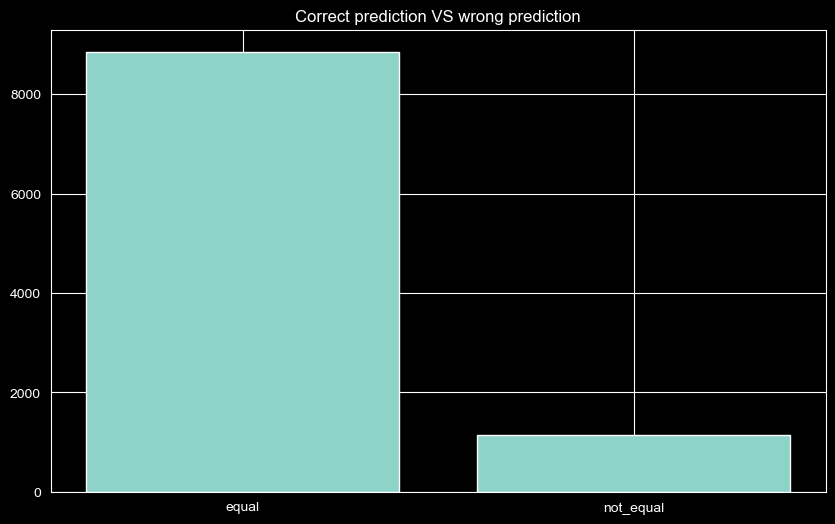

In [47]:
pred_prob2 = model2.predict(X_test2)
y_pred2 = np.argmax(pred_prob2, axis=1)
print(classification_report(y_test2, y_pred2))
print("-------------------------------------------------------------")
plt.figure(figsize=(9, 5))
sns.heatmap(
    confusion_matrix(y_test2, y_pred2),
    annot=True,
    cmap="Blues",
    linewidths=0.5,
    linecolor="black",
    fmt="g",
    annot_kws={"size": 15},)
plt.title("prediction")
plt.show();
print("-------------------------------------------------------------\n")
equal2 = np.equal(y_test2, y_pred2).sum()
not_equal2= np.not_equal(y_test2, y_pred2).sum()
plt.bar(['equal','not_equal'] , [equal2,not_equal2] )
plt.title("Correct prediction VS wrong prediction")
plt.show();

In [48]:
score2 = model2.evaluate(X_test2, Y_test2, verbose=0)
print("Test loss:", score2[0])
print("Test accuracy:", score2[1])

Test loss: 0.34979039430618286
Test accuracy: 0.8852999806404114


## Attempting with Third Model

In [67]:
model3 = Sequential()

model3.add(
    Conv2D(filters=28, 
           kernel_size=(3, 3),
           input_shape=(28, 28, 1), 
           activation="relu")
)
model3.add(MaxPool2D(pool_size=(2, 2), strides=(1, 1)))

model3.add(Conv2D(filters=64, kernel_size=(3, 3), activation="relu"))
model3.add(MaxPool2D(pool_size=(2, 2), strides=(1, 1)))

model3.add(Conv2D(filters=64, kernel_size=(3, 3), activation="relu"))
model3.add(MaxPool2D(pool_size=(2, 2), strides=(1, 1)))

model3.add(Flatten())

model3.add(Dense(128, activation="relu"))
model3.add(Dropout(0.5))

model3.add(Dense(10, activation= "softmax"))

# optimizer = keras.optimizers.Adam(lr=0.01)
model3.compile(loss="categorical_crossentropy", optimizer="rmsprop", metrics=["accuracy"])

In [68]:
from keras.callbacks import EarlyStopping

early_stop = EarlyStopping(
    monitor="val_loss", mode="min", patience=4, restore_best_weights=True)

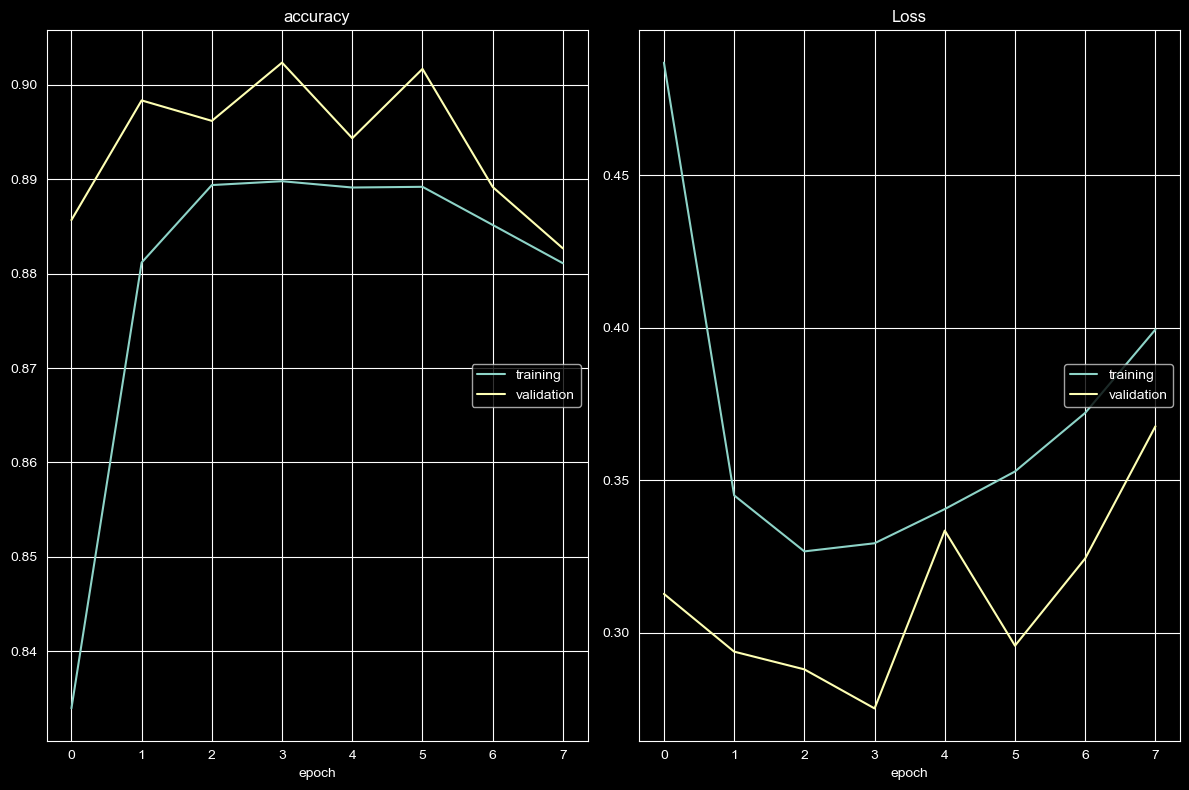

accuracy
	training         	 (min:    0.834, max:    0.890, cur:    0.881)
	validation       	 (min:    0.883, max:    0.902, cur:    0.883)
Loss
	training         	 (min:    0.327, max:    0.487, cur:    0.399)
	validation       	 (min:    0.275, max:    0.368, cur:    0.368)
1688/1688 [==============================] - 104s 62ms/step - loss: 0.3994 - accuracy: 0.8811 - val_loss: 0.3677 - val_accuracy: 0.8827


In [69]:
model3.fit(
    X_train2,
    Y_train2,
    batch_size=32,
    epochs=20,
    validation_data=(X_val, Y_val),
    callbacks=[PlotLossesKerasTF(), early_stop],
)

In [70]:
def plot_subplots():
    
    loss_df = pd.DataFrame(model3.history.history)
    
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

    # Plotting the first subplot (valscores1)
    valscores1 = loss_df.drop(columns=["accuracy", "val_accuracy"], axis=1)
    valscores1.plot(ax=axes[0])
    axes[0].set_title("Loss Scores")
    axes[0].set_xlabel("Epochs")
    axes[0].set_ylabel("Scores")

    # Plotting the second subplot (accscores1)
    accscores1 = loss_df.drop(columns=["loss", "val_loss"], axis=1)
    accscores1.plot(ax=axes[1])
    axes[1].set_title("Accuracy Scores")
    axes[1].set_xlabel("Epochs")
    axes[1].set_ylabel("Scores")

    # Adjust layout
    plt.tight_layout()

    # Show the plots
    plt.show()

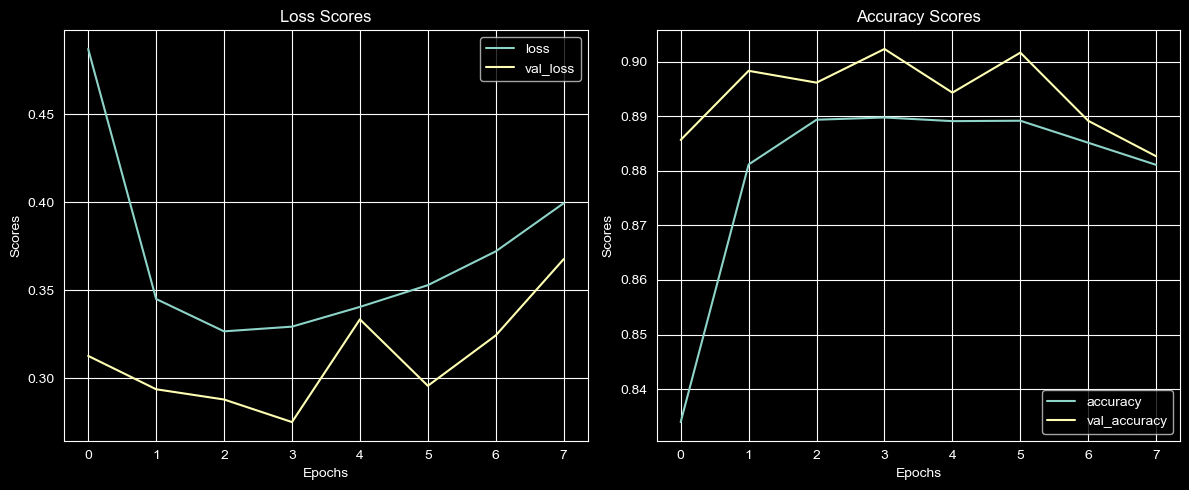

In [71]:
plot_subplots()

313/313 [==============================] - 2s 6ms/step
              precision    recall  f1-score   support

           0       0.84      0.83      0.83      1000
           1       0.99      0.97      0.98      1000
           2       0.88      0.80      0.84      1000
           3       0.90      0.90      0.90      1000
           4       0.79      0.86      0.82      1000
           5       0.99      0.96      0.97      1000
           6       0.66      0.70      0.68      1000
           7       0.92      0.98      0.95      1000
           8       0.99      0.96      0.97      1000
           9       0.97      0.95      0.96      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000

-------------------------------------------------------------


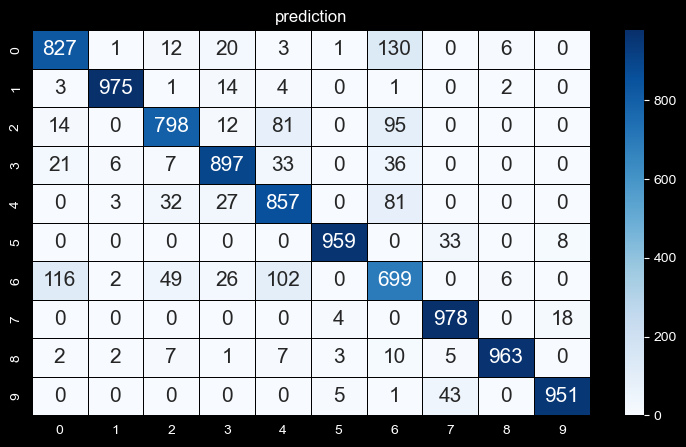

-------------------------------------------------------------



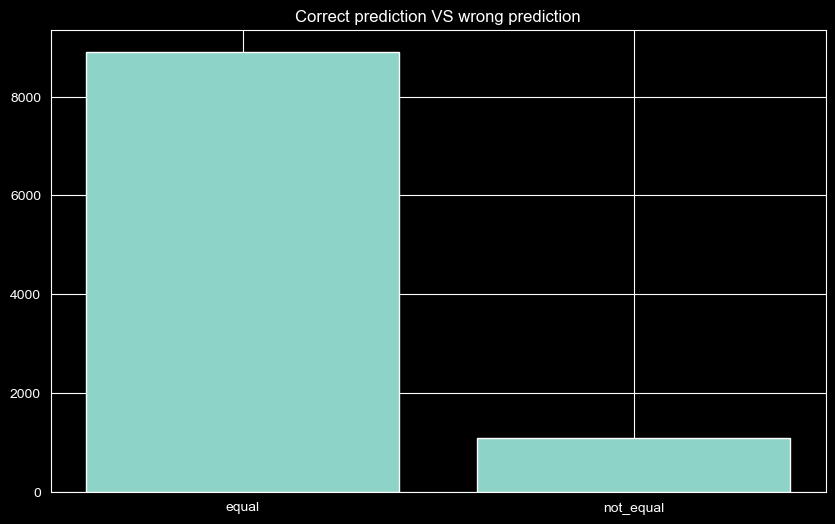

In [72]:
pred_prob2 = model3.predict(X_test2)
y_pred2 = np.argmax(pred_prob2, axis=1)
print(classification_report(y_test2, y_pred2))
print("-------------------------------------------------------------")
plt.figure(figsize=(9, 5))
sns.heatmap(
    confusion_matrix(y_test2, y_pred2),
    annot=True,
    cmap="Blues",
    linewidths=0.5,
    linecolor="black",
    fmt="g",
    annot_kws={"size": 15},)
plt.title("prediction")
plt.show();
print("-------------------------------------------------------------\n")
equal2 = np.equal(y_test2, y_pred2).sum()
not_equal2= np.not_equal(y_test2, y_pred2).sum()
plt.bar(['equal','not_equal'] , [equal2,not_equal2] )
plt.title("Correct prediction VS wrong prediction")
plt.show();

In [74]:
score3 = model3.evaluate(X_test2, Y_test2, verbose=0)
print("Test loss:", score2[0])
print("Test accuracy:", score2[1])

Test loss: 0.30683988332748413
Test accuracy: 0.8903999924659729


## Trying out Fourth Model (With Regularization)

In [76]:
# Add extra one layer and dropout (0.01)
model4 = Sequential()
model4.add(Conv2D(filters=28, 
                kernel_size=(3, 3), 
                input_shape=(28, 28, 1), 
                activation="relu", 
                padding="same"))
model4.add(MaxPool2D(pool_size=(2, 2), 
                    strides = (1, 1)))
model4.add(Dropout(0.01))
                       
model4.add(Conv2D(filters=56, 
                kernel_size=(3, 3), 
                activation="relu", 
                padding="same"))
model4.add(MaxPool2D(pool_size=(2, 2), 
                strides = (1, 1)))
model4.add(Dropout(0.01))
                       
model4.add(Flatten())
model4.add(Dense(128,
                activation='relu', 
                kernel_regularizer=tf.keras.regularizers.l2(0.1)))
model4.add(Dropout(0.01))
                       
model4.add(Dense(64,
                activation='relu', 
                kernel_regularizer=tf.keras.regularizers.l2(0.1)))
model4.add(Dropout(0.01))
                       
model4.add(Dense(10,
                            activation='softmax'))
model4.compile(loss="categorical_crossentropy",
                optimizer="rmsprop", 
                metrics=['accuracy'])

In [77]:
from keras.callbacks import EarlyStopping

early_stop = EarlyStopping(
    monitor="val_loss", mode="min", patience=4, restore_best_weights=True)

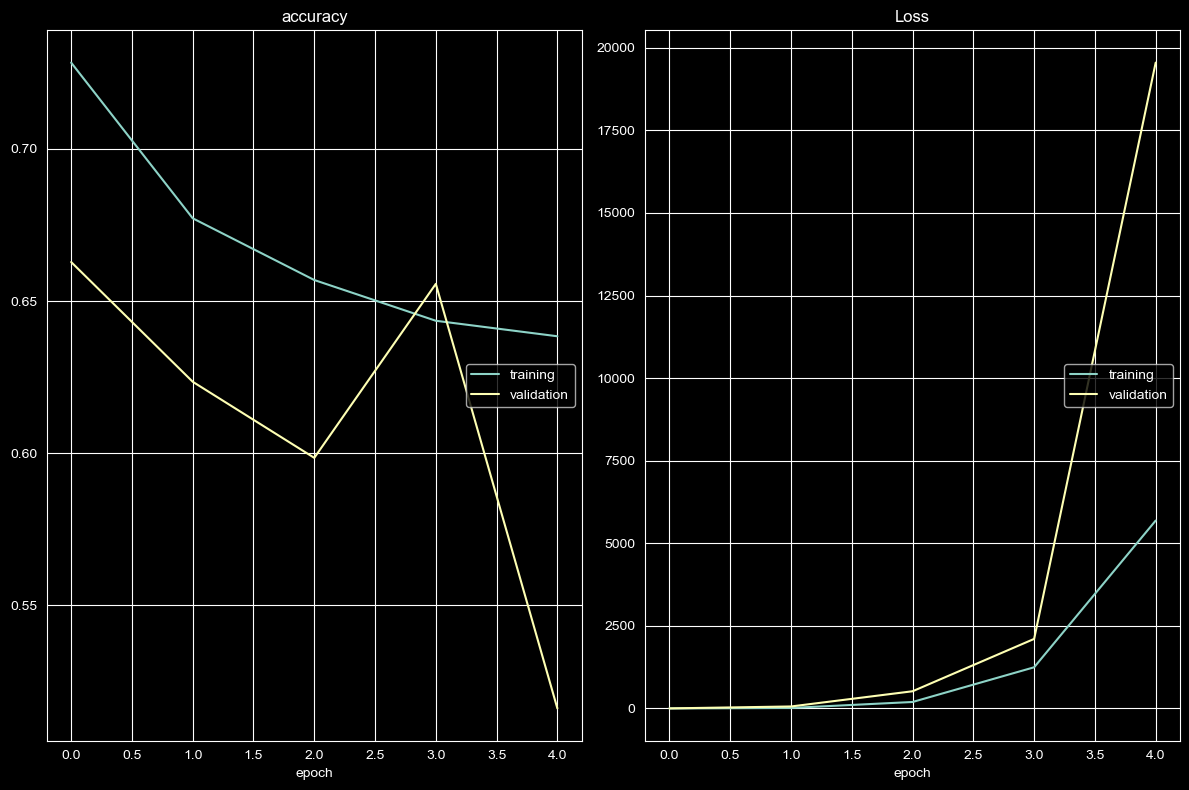

accuracy
	training         	 (min:    0.638, max:    0.728, cur:    0.638)
	validation       	 (min:    0.516, max:    0.663, cur:    0.516)
Loss
	training         	 (min:    1.125, max: 5688.654, cur: 5688.654)
	validation       	 (min:    1.965, max: 19552.439, cur: 19552.439)
1688/1688 [==============================] - 256s 152ms/step - loss: 5688.6543 - accuracy: 0.6384 - val_loss: 19552.4395 - val_accuracy: 0.5162


In [79]:
model4.fit(
    X_train2,
    Y_train2,
    batch_size=32,
    epochs=20,
    validation_data=(X_val, Y_val),
    callbacks=[PlotLossesKerasTF(), early_stop],
)

In [80]:
def plot_subplots():
    
    loss_df = pd.DataFrame(model4.history.history)
    
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

    # Plotting the first subplot (valscores1)
    valscores1 = loss_df.drop(columns=["accuracy", "val_accuracy"], axis=1)
    valscores1.plot(ax=axes[0])
    axes[0].set_title("Loss Scores")
    axes[0].set_xlabel("Epochs")
    axes[0].set_ylabel("Scores")

    # Plotting the second subplot (accscores1)
    accscores1 = loss_df.drop(columns=["loss", "val_loss"], axis=1)
    accscores1.plot(ax=axes[1])
    axes[1].set_title("Accuracy Scores")
    axes[1].set_xlabel("Epochs")
    axes[1].set_ylabel("Scores")

    # Adjust layout
    plt.tight_layout()

    # Show the plots
    plt.show()

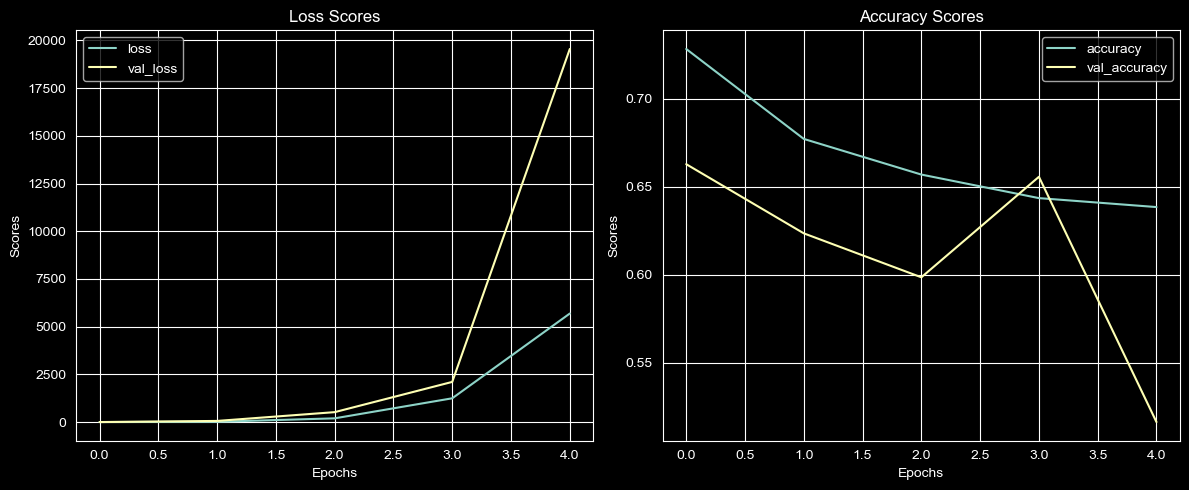

In [81]:
plot_subplots()

313/313 [==============================] - 2s 7ms/step
              precision    recall  f1-score   support

           0       0.45      0.90      0.60      1000
           1       0.99      0.91      0.94      1000
           2       0.38      0.94      0.54      1000
           3       0.86      0.47      0.60      1000
           4       0.69      0.02      0.05      1000
           5       0.98      0.71      0.82      1000
           6       0.17      0.01      0.02      1000
           7       0.69      0.99      0.81      1000
           8       0.81      0.88      0.85      1000
           9       0.97      0.74      0.84      1000

    accuracy                           0.66     10000
   macro avg       0.70      0.66      0.61     10000
weighted avg       0.70      0.66      0.61     10000

-------------------------------------------------------------


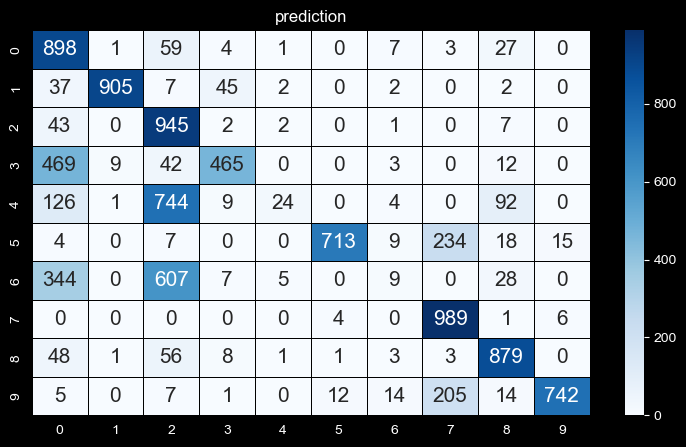

-------------------------------------------------------------



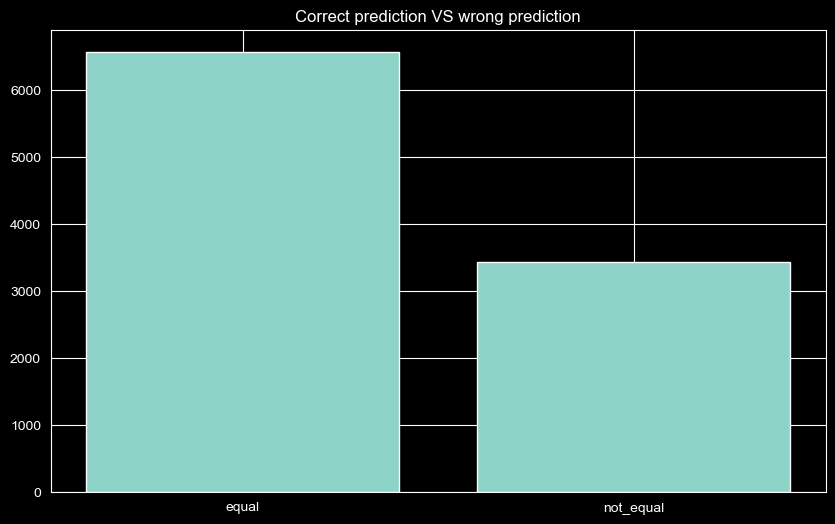

In [82]:
pred_prob2 = model4.predict(X_test2)
y_pred2 = np.argmax(pred_prob2, axis=1)
print(classification_report(y_test2, y_pred2))
print("-------------------------------------------------------------")
plt.figure(figsize=(9, 5))
sns.heatmap(
    confusion_matrix(y_test2, y_pred2),
    annot=True,
    cmap="Blues",
    linewidths=0.5,
    linecolor="black",
    fmt="g",
    annot_kws={"size": 15},)
plt.title("prediction")
plt.show();
print("-------------------------------------------------------------\n")
equal2 = np.equal(y_test2, y_pred2).sum()
not_equal2= np.not_equal(y_test2, y_pred2).sum()
plt.bar(['equal','not_equal'] , [equal2,not_equal2] )
plt.title("Correct prediction VS wrong prediction")
plt.show();

In [83]:
score4 = model4.evaluate(X_test2, Y_test2, verbose=0)
print("Test loss:", score2[0])
print("Test accuracy:", score2[1])

Test loss: 0.30683988332748413
Test accuracy: 0.8903999924659729


## Comparing All Models

In [102]:
model_names = ["First Attempt", "With Validation", "Val + Dropout", "Val + Regularization"]

# Creating a DataFrame
data = {
    "Model": model_names,
    "Loss": [score[0], score2[0], score3[0], score4[0]],
    "Accuracy": [score[1], score2[1], score3[1], score4[1]]
}

allmodels = pd.DataFrame(data)
allmodels

,Model,Loss,Accuracy
0,First Attempt,0.331,0.895
1,With Validation,0.307,0.890
2,Val + Dropout,0.307,0.890
3,Val + Regularization,2.011,0.657


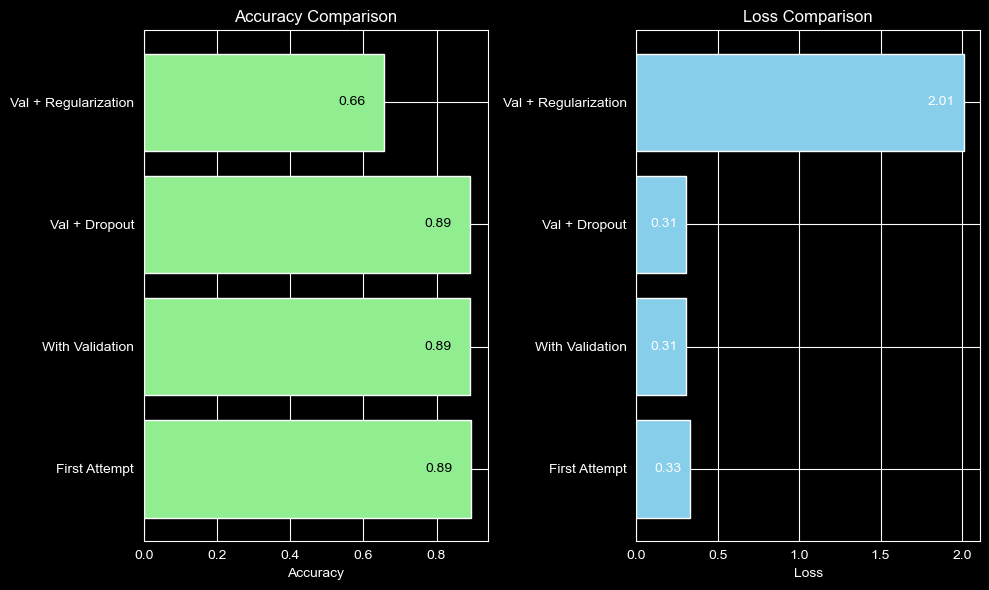

In [115]:
# Sort the DataFrame by "Accuracy" in descending order for left subplot
df_accuracy_sorted = allmodels#.sort_values(by='Accuracy')

# Sort the DataFrame by "Loss" in ascending order for right subplot
df_loss_sorted = allmodels#.sort_values(by='Loss', ascending=False)

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 6))

# Plot Accuracy (sorted order, highest to lowest, from top to bottom)
accuracy_bars = axes[0].barh(df_accuracy_sorted["Model"], df_accuracy_sorted["Accuracy"], color='lightgreen')
axes[0].set_xlabel('Accuracy')
axes[0].set_title('Accuracy Comparison')

# Annotate Accuracy bars with their values
for bar in accuracy_bars:
    axes[0].text(bar.get_width() - 0.05, bar.get_y() + bar.get_height()/2, f'{bar.get_width():.2f}', 
                 va='center', ha='right', color='black')

# Plot Loss (sorted order, lowest to highest, from top to bottom)
loss_bars = axes[1].barh(df_loss_sorted["Model"], df_loss_sorted["Loss"], color='skyblue')
axes[1].set_xlabel('Loss')
axes[1].set_title('Loss Comparison')

# Annotate Loss bars with their values
for bar in loss_bars:
    axes[1].text(bar.get_width() - 0.22, bar.get_y() + bar.get_height()/2, f'{bar.get_width():.2f}', 
                 va='center', ha='left', color='white')

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()

## Selecting Best Model (First Attempt)

In [116]:
pred_prob = model.predict(X_test)
pred_prob

313/313 [==============================] - 1s 3ms/step


array([[0.        , 0.        , 0.00000002, ..., 0.00053788, 0.00000368,
        0.9690587 ],
       [0.00080103, 0.        , 0.99904996, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.00000259, 0.        , 0.0000011 , ..., 0.        , 0.9998621 ,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.00011427, 0.0000015 , 0.00316421, ..., 0.09965441, 0.01287068,
        0.00107623]], dtype=float32)

In [117]:
pred_prob.shape

(10000, 10)

In [118]:
pred_prob[0]

array([0.        , 0.        , 0.00000002, 0.        , 0.00000003,
       0.03039971, 0.00000001, 0.00053788, 0.00000368, 0.9690587 ],
      dtype=float32)

In [119]:
np.argmax(pred_prob[0])

9

In [120]:
y_pred = np.argmax(pred_prob, axis=1)
y_pred

array([9, 2, 1, ..., 8, 1, 5])

In [121]:
y_pred.shape

(10000,)

In [122]:
# y_test != y_pred
np.not_equal(y_test, y_pred)

array([False, False, False, ..., False, False, False])

In [123]:
# (y_test != y_pred).sum()
np.not_equal(y_test, y_pred).sum()

1055

In [124]:
np.equal(y_test, y_pred).sum()

8945

## Prediction

In [125]:
my_number = X_test[3]

In [126]:
my_number.shape

(28, 28, 1)

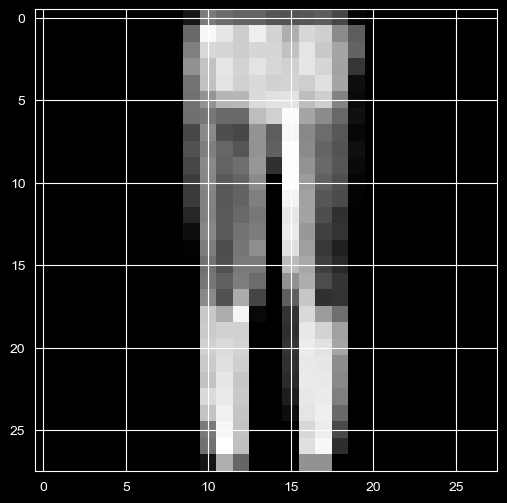

In [127]:
plt.imshow(my_number, cmap="gray")
plt.show()

In [128]:
np.expand_dims(my_number, 0).shape

(1, 28, 28, 1)

In [129]:
pred_prob = model.predict(np.expand_dims(my_number, 0))
pred_prob

1/1 [==============================] - 0s 279ms/step


array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [131]:
# SHAPE --> (num_images, width, height, color_channels)
y_pred = np.argmax(pred_prob)
y_pred

1

## Model Saving

In [132]:
model.save("cnnfashion.h5")

/Users/rakan/anaconda3/envs/tfmetal/lib/python3.11/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [133]:
model = tf.keras.models.load_model("cnnfashion.h5")

In [134]:
pred = model.predict(np.expand_dims(X_test[24], 0))

1/1 [==============================] - 0s 155ms/step


In [135]:
np.argmax(pred)

1

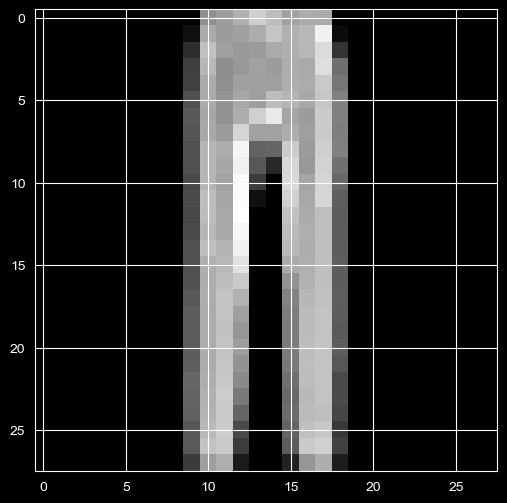

In [136]:
plt.imshow(X_test[24].reshape(28, 28), cmap="gray")
plt.show()

In [137]:
pred = model.predict(X_test2)
pred = np.argmax(np.round(pred),axis=1)

313/313 [==============================] - 1s 3ms/step


Found 8896 correct labels out of 10000


/var/folders/h9/j3hcxdjj46zcp_9ysywqy39r0000gn/T/ipykernel_35109/1183220620.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout();
/var/folders/h9/j3hcxdjj46zcp_9ysywqy39r0000gn/T/ipykernel_35109/1183220620.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3,3,i+1);


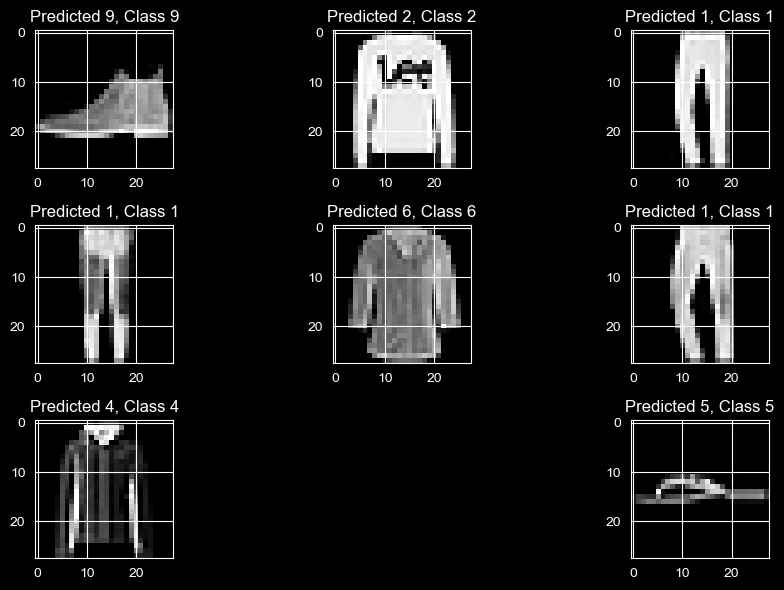

In [143]:
correct = np.where(pred==y_test2)[0]
print ("Found %d correct labels" % len(correct),"out of 10000") 
for i, correct in enumerate(correct[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test2[correct].reshape(28,28), interpolation='none', cmap='gray')
    plt.title("Predicted {}, Class {}".format(pred[correct], y_test2[correct]))
    plt.tight_layout()

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___